In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df = df.drop(['Invoice ID','Date','Time'],axis=1)

In [7]:
df['gross margin percentage'].unique()

array([4.76190476])

In [8]:
df=df.drop(['gross margin percentage'],axis=1)

In [9]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3


Data Visualization

In [10]:
print(df.shape)
df['Gender'].value_counts()

(1000, 13)


Female    501
Male      499
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

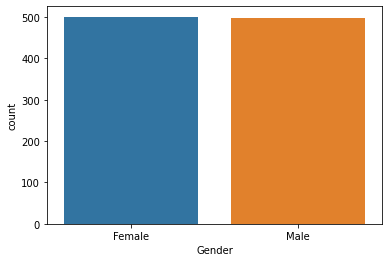

In [11]:
sns.countplot(x='Gender',data=df)

In [12]:
gender_dummies = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [13]:
df = pd.concat([df,gender_dummies],axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


<AxesSubplot:xlabel='Product line', ylabel='Female'>

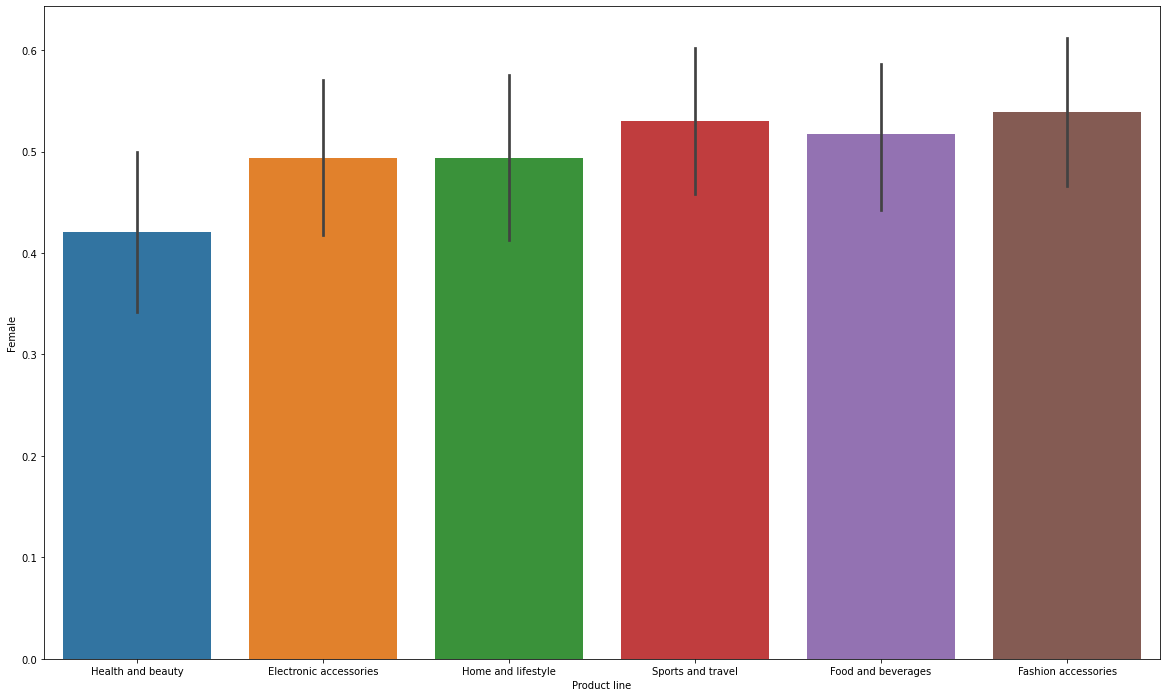

In [14]:
plt.figure(figsize=(20,12))
sns.barplot(x='Product line',y='Female',data=df)

<AxesSubplot:xlabel='Product line', ylabel='Male'>

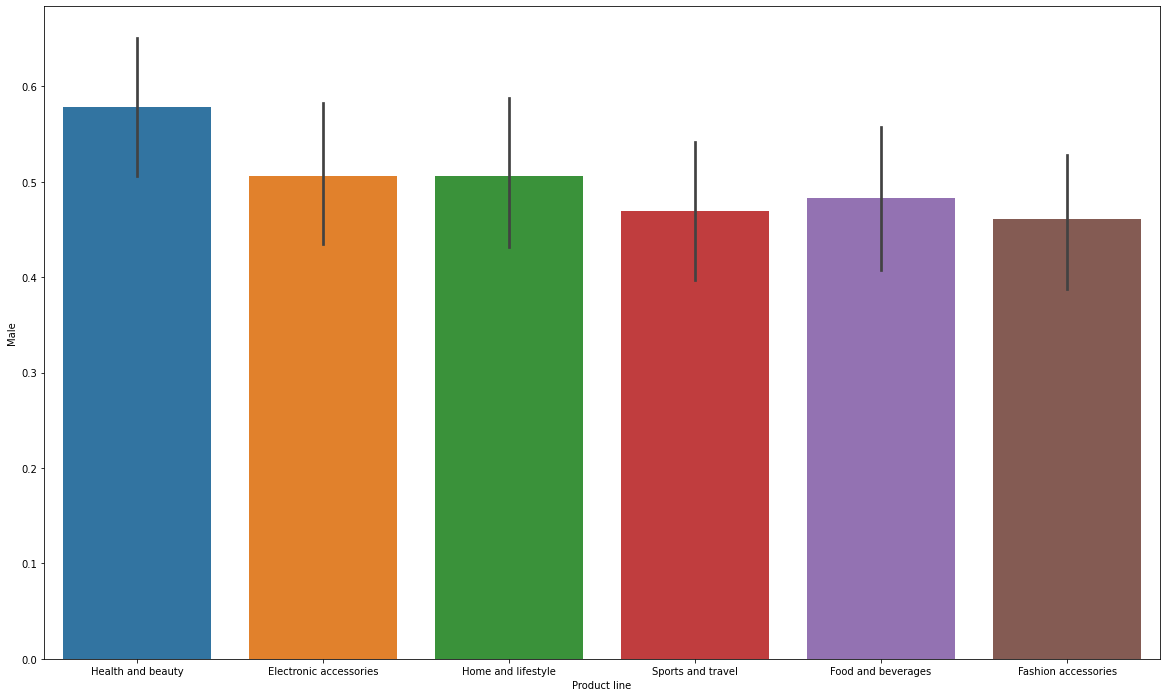

In [15]:
plt.figure(figsize=(20,12))
sns.barplot(x='Product line',y='Male',data=df)

**Plotting Customers per city**

In [16]:

place_df = pd.DataFrame(df['City'].value_counts())


<AxesSubplot:ylabel='City'>

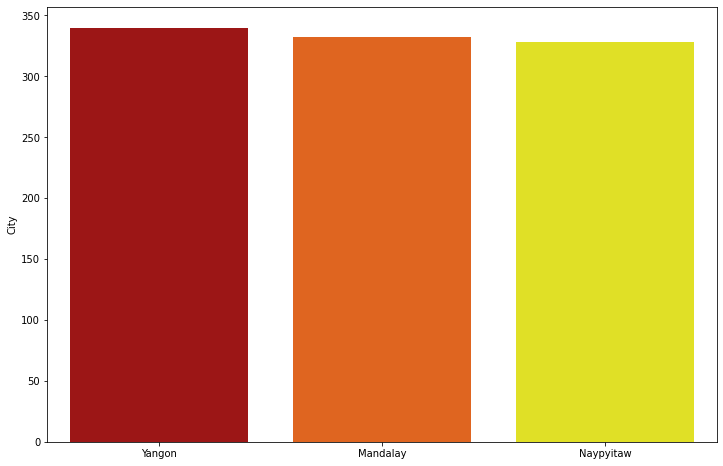

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x=place_df.index,y=place_df['City'],palette='hot')

In [18]:
payment_df = pd.DataFrame(df['Payment'].value_counts())

<AxesSubplot:ylabel='Payment'>

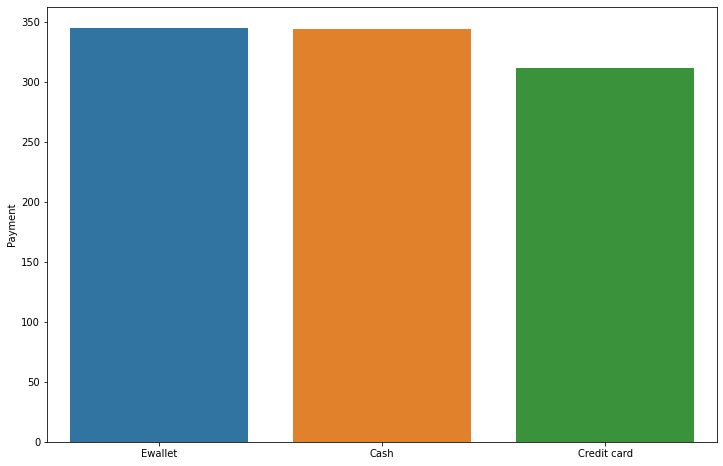

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=payment_df.index,y=payment_df['Payment'])


**Gross Income for each Products line**

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

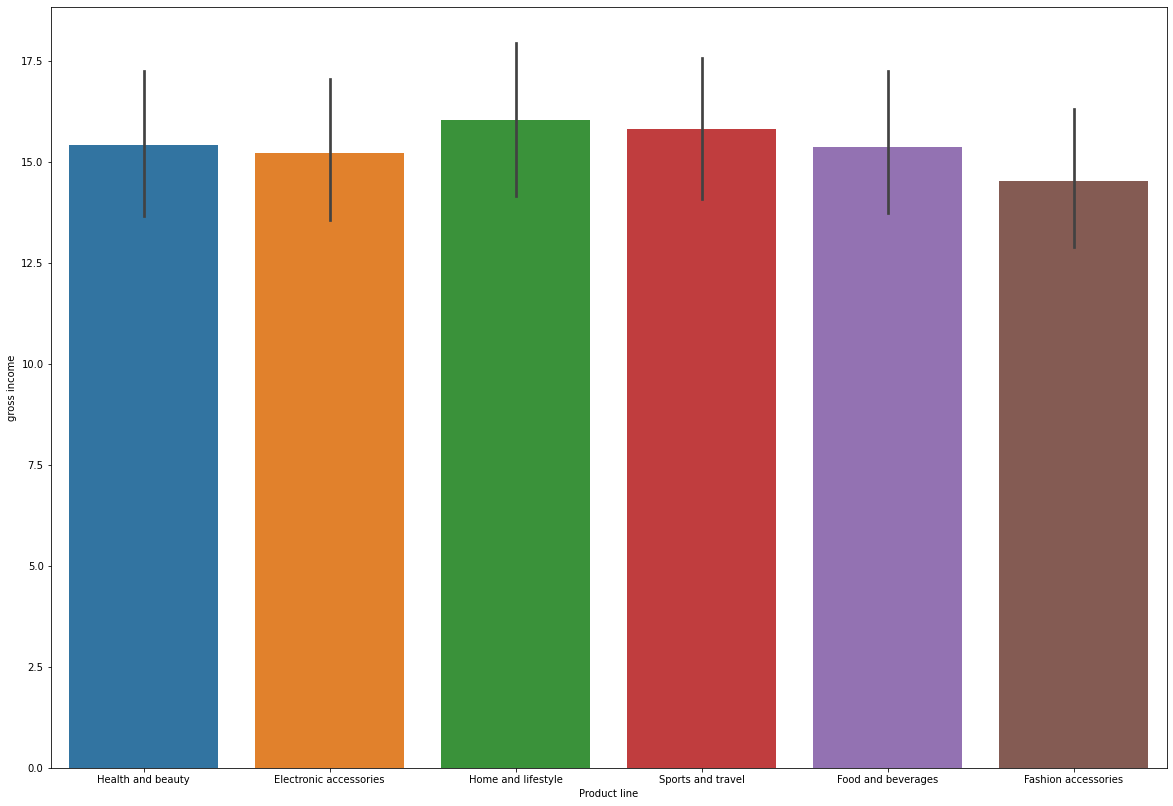

In [20]:
plt.figure(figsize=(20,14))
sns.barplot(x=df['Product line'],y=df['gross income'])

****Getting Rating Plot for each product line

In [21]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


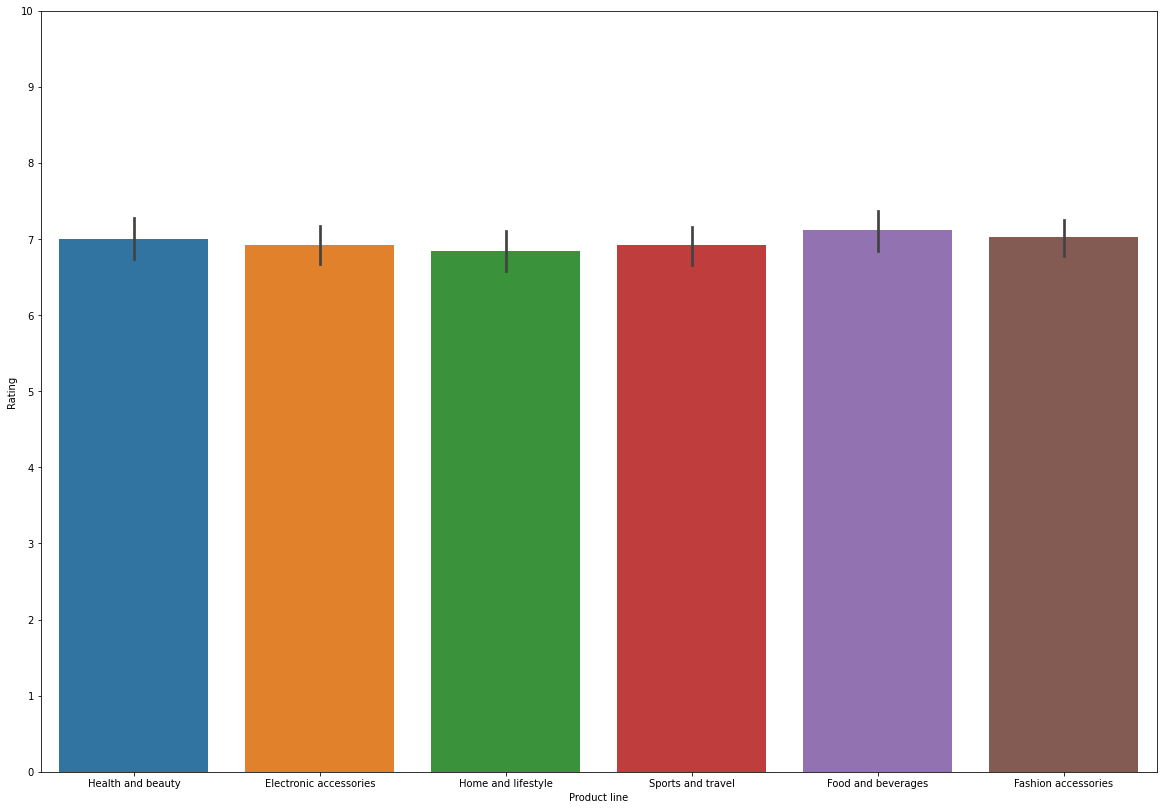

In [22]:
yData = [x for x in range(11)]
plt.figure(figsize=(20,14))
sns.barplot(y=df['Rating'],x=df['Product line'])
_ = plt.yticks(yData)

****

**Total bill in each prouct line**

<AxesSubplot:xlabel='Product line', ylabel='Total'>

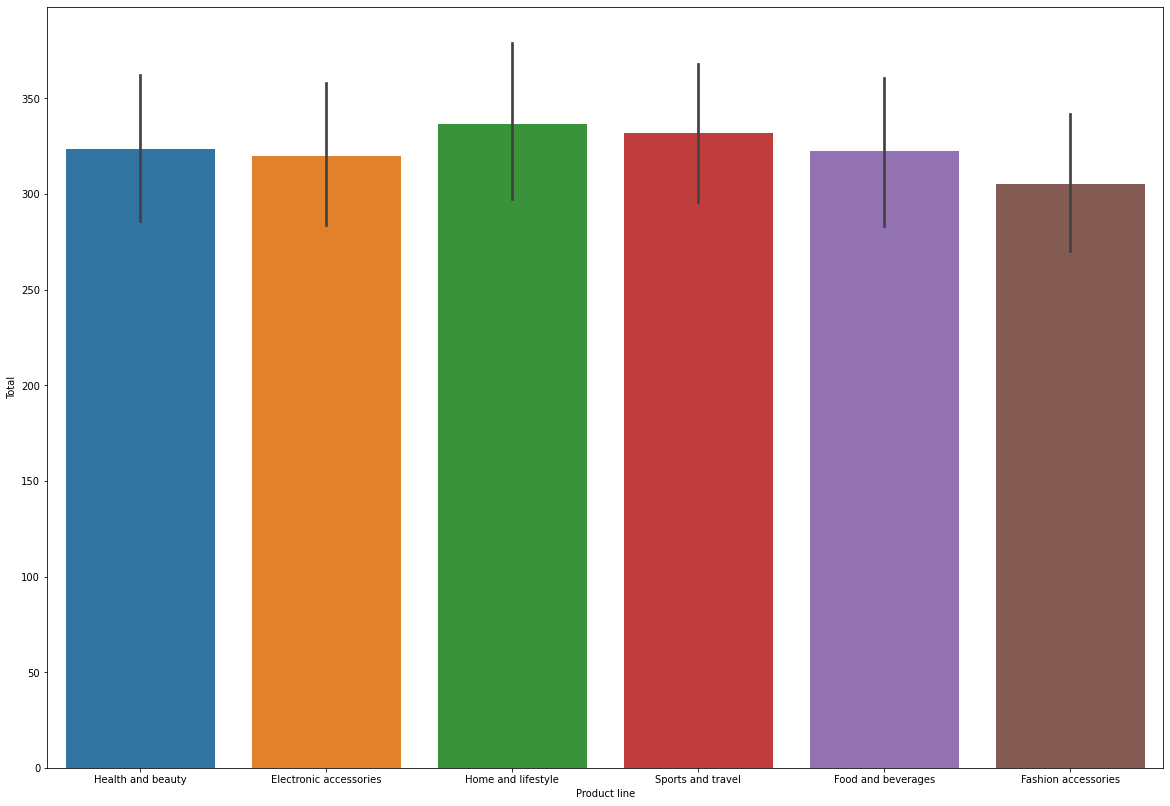

In [23]:

plt.figure(figsize=(20,14))
sns.barplot(y=df['Total'],x=df['Product line'])


In [24]:

#plt.figure(figsize=(20,14))
#sns.histplot(df['Quantity'])
#plt.xticks(np.arange(0,10,0.5))



<AxesSubplot:ylabel='Quantity'>

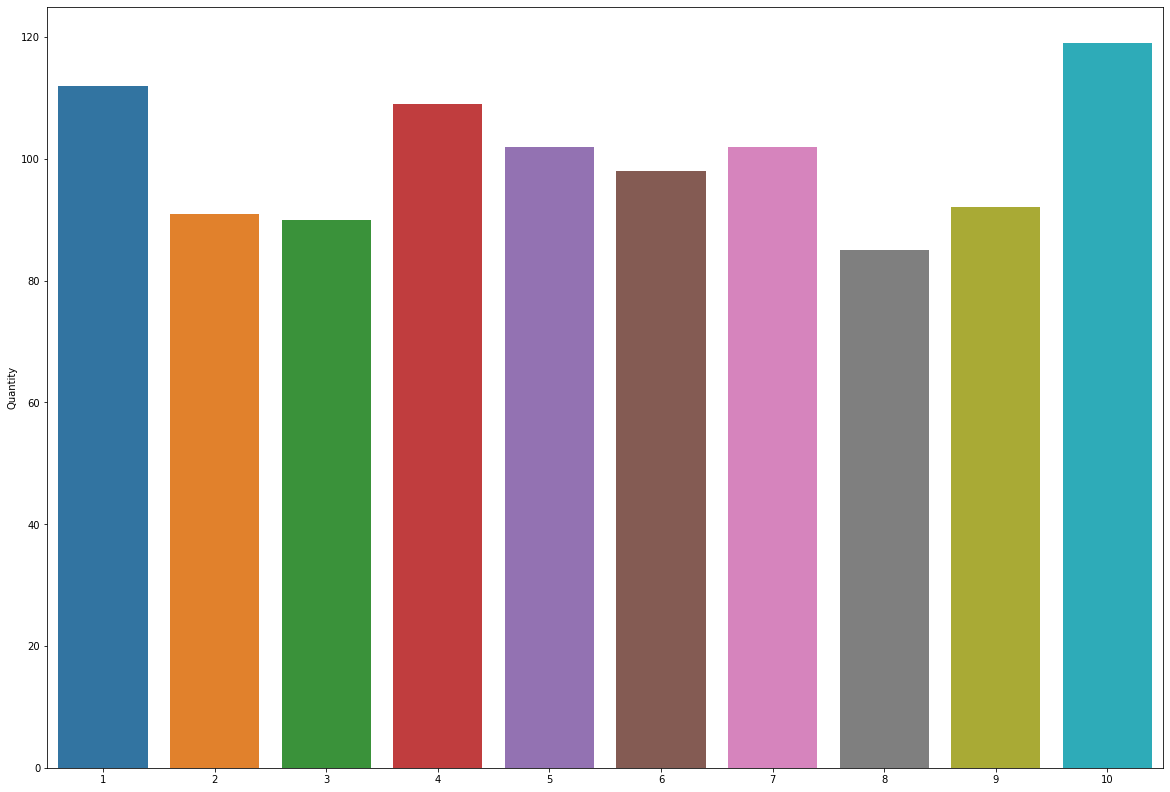

In [25]:
quantity_df = pd.DataFrame(df['Quantity'].value_counts())
plt.figure(figsize=(20,14))
sns.barplot(x=quantity_df.index,y=quantity_df['Quantity'])

**Infernce from the analysis**
1. Total Customers = 1000
2. Total Females = 501
3. Total Males = 499
4. Min Rating = 4
5. Max Rating = 10
6. Average Rating = 6.97
7. Best Average Rating in food and & beverages
8. Min Average Gross Income in Home & Lifestyle
9. Min Average Gross Income in fashion accessiories
10. maxium customer buy 10 quantities
11. Max Average total bill in home & lifestyle
12. Min Average total bill in fashion accessories
13. maxium people pay through e-wallet
14. maxium people come from yogan city